# Euler's 3-Body Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Problem Statement

How does a planet move under the force of gravity due to two stars fixed in space?

:::{seealso}
Check out [Wikipedia: Euler's 3-Body Problem](https://en.wikipedia.org/wiki/Euler%27s_three-body_problem) for more information.
:::

## Variables and Parameters

| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| position of planet in $x$-direction | $x$ | L | dependent variable |
| position of planet in $y$-direction | $y$ | L | dependent variable |
| time | $t$ | T | independent variable |
| mass of planet | $m_p$ | M | parameter |
| mass of star 1 | $m_1$ | M | parameter |
| mass of star 2 | $m_2$ | M | parameter |
| gravitational constant | $G$ | L<sup>3</sup>T<sup>-2</sup>M<sup>-1</sup> | parameter |
| distance of each star from the origin | $d$ | L | parameter |

## Assumptions and Constraints

* planet moves in $xy$-plane only
* star 1 is located on the $x$-axis at $(-d,0)$
* star 2 is located on the $x$-axis at $(+d,0)$

## Model Construction

The unit vector that points from the planet to star 1 is

$$
\left( -\frac{x+d}{\sqrt{(x+d)^2 + y^2}} , -\frac{y}{\sqrt{(x+d)^2 + y^2}} \right)
$$

and the unit vector that points from the planet to star 2 is

$$
\left( -\frac{x-d}{\sqrt{(x-d)^2 + y^2}} , -\frac{y}{\sqrt{(x-d)^2 + y^2}} \right)
$$

The sum of the gravitational forces of both stars acting on the planet is

$$
\begin{align*}
\mathbf{F} &= \frac{Gm_pm_1}{(x+d)^2 + y^2} \left( -\frac{x+d}{\sqrt{(x+d)^2 + y^2}} , -\frac{y}{\sqrt{(x+d)^2 + y^2}} \right) \\
& \quad \quad + \ \frac{Gm_pm_2}{(x-d)^2 + y^2} \left( -\frac{x-d}{\sqrt{(x-d)^2 + y^2}} , -\frac{y}{\sqrt{(x-d)^2 + y^2}} \right)
\end{align*}
$$

Apply Newton's second law of motion to get a second order, 2-dimenisional, nonlinear system of differential equations

$$
\begin{align*}
\frac{d^2x}{dt^2} &= -\frac{G m_1 (x+d)}{\left( (x+d)^2 + y^2 \right)^{3/2}} - \frac{G m_2 (x-d)}{\left( (x-d)^2 + y^2 \right)^{3/2}} \\
\frac{d^2y}{dt^2} &= -\frac{G m_1 y}{\left( (x+d)^2 + y^2 \right)^{3/2}} - \frac{G m_2 y}{\left( (x-d)^2 + y^2 \right)^{3/2}}
\end{align*}
$$

with initial conditions

$$
x(0) = x_0 \ , \ \ y(0) = y_0 \ , \ \ x'(0) = v_{x,0} \ , \ \ y'(0) = v_{y,0} \ , \ \ 
$$

Apply nondimensionalization procedure. Let $x = [x]x^*$, $y = [y]y^*$ and $t = [t]t^*$. It will simplify the equations greatly if we choose the same scaling factor $[c] = [x] = [y]$ for $x$ and $y$. Make the substitutions

$$
\begin{align*}
\frac{[c]}{[t]^2} \frac{d^2x^*}{dt^{*2}} &= -\frac{G m_1 ([c]x^* + d)}{\left( ([c]x^*+d)^2 + [c]^2y^{*2} \right)^{3/2}} - \frac{G m_2 ([c]x^*-d)}{\left( ([c]x^*-d)^2 + [c]^2y^{*2} \right)^{3/2}} \\
\frac{[c]}{[t]^2} \frac{d^2y^*}{dt^{*2}} &= -\frac{G m_1 [c]y^*}{\left( ([c]x^*+d)^2 + [c]^2y^{*2} \right)^{3/2}} - \frac{G m_2 [c]y^*}{\left( ([c]x^*-d)^2 + [c]y^{*2} \right)^{3/2}}
\end{align*}
$$

Divide by highest order term and simplify

$$
\begin{align*}
\frac{d^2x^*}{dt^{*2}} &= -\frac{G m_1 [t]^2 (x^* + d^*)}{[c]^3 \left( (x^*+d^*)^2 + y^{*2} \right)^{3/2}} - \frac{G m_2 [t]^2 (x^*-d^*)}{[c]^3 \left( (x^*-d^*)^2 + y^{*2} \right)^{3/2}} \\
\frac{d^2y^*}{dt^{*2}} &= -\frac{G m_1 [t]^2 y^*}{[c]^3 \left( (x^*+d^*)^2 + y^{*2} \right)^{3/2}} - \frac{G m_2 [t]^2 y^*}{[c]^3 \left( (x^*-d^*)^2 + y^{*2} \right)^{3/2}}
\end{align*}
$$

where $d^* = d/[c]$. There are many choices and we choose $[c] = d$ and $[t] = \sqrt{\frac{d^3}{Gm_1}}$ and we arrive at

$$
\begin{align*}
\frac{d^2x^*}{dt^{*2}} &= -\frac{(x^* + 1)}{\left( (x^*+1)^2 + y^{*2} \right)^{3/2}} - \mu \frac{(x^*-1)}{\left( (x^*-1)^2 + y^{*2} \right)^{3/2}} \\
\frac{d^2y^*}{dt^{*2}} &= -\frac{y^*}{\left( (x^*+1)^2 + y^{*2} \right)^{3/2}} - \mu \frac{y^*}{\left( (x^*-1)^2 + y^{*2} \right)^{3/2}} \\
x^*(0) &= \frac{x_0}{d} \ , \ \ y^*(0) = \frac{y_0}{d} \\
\frac{dx^*}{dt^*}(0) &= v_{x,0} \sqrt{\frac{d}{Gm_1}} \ , \ \ \frac{dy^*}{dt^*}(0) = v_{y,0}\sqrt{\frac{d}{Gm_1}} \ , \ \ 
\end{align*}
$$

where $\mu = \frac{m_2}{m_1}$.

Introduce new variables $u_0 = x^*$, $u_1 = \frac{dx}{dt^*}$, $u_2 = y$, and $u_3 = \frac{dy}{dt^*}$ to find

$$
\begin{align*}
\frac{du_0}{dt^*} &= u_1 \\
\frac{du_1}{dt^*} &= -\frac{(u_0 + 1)}{\left( (u_0+1)^2 + u_2^2 \right)^{3/2}} - \mu \frac{(u_0-1)}{\left( (u_0-1)^2 + u_2^2 \right)^{3/2}} \\
\frac{du_2}{dt^*} &= u_3 \\
\frac{du_3}{dt^*} &= -\frac{u_2}{\left( (u_0+1)^2 + u_2^2 \right)^{3/2}} - \mu \frac{u_2}{\left( (u_0-1)^2 + u_2^2 \right)^{3/2}}
\end{align*}
$$

Plot some trajectories!

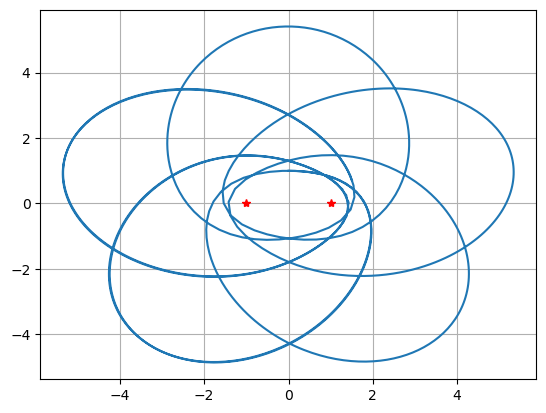

In [26]:
mu = 1.

def f(u,t):
    dudt = np.array([0.,0.,0.,0.])
    D1 = ((u[0] + 1)**2 + u[2]**2)**(3/2)
    D2 = ((u[0] - 1)**2 + u[2]**2)**(3/2)
    dudt[0] = u[1]
    dudt[1] = -(u[0] + 1)/D1 - mu*(u[0] - 1)/D2
    dudt[2] = u[3]
    dudt[3] = -u[2]/D1 - mu*u[2]/D2
    return dudt

u0 = [0.,1.5,1.,0.]
t = np.linspace(0,200,1000)
u = spi.odeint(f,u0,t)
plt.plot(u[:,0],u[:,2],-1,0,'r*',1,0,'r*'), plt.grid(True)
plt.show()

## Analysis

*Under construction*